# Exploration Notebook

#### This notebook is used to explore the data engineered in the previous notebook and create the final dataset for modeling.

## Imports

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df = pd.read_csv('data/processed.csv')
df.head(1)

,selftext,title,conspiracy,post_length,post_words,title_length,title_words,000 year ago,01 pdf fr,01 pdf fr 1984,...,zizek,zombi,selftext_neg,selftext_neu,selftext_pos,selftext_compound,title_neg,title_neu,title_pos,title_compound
0,video tcuixijbfci tcuixijbfci seen discuss yet...,veteran advoc 2a support jon stewart eviscer n...,1,403,57,71,10,0,0,0,...,0,0,0.229,0.635,0.136,-0.4767,0.0,0.748,0.252,0.4019


## Post length and word count distributions by subreddit:

In [283]:
# We have some really far out values for post length. Let's look at the distribution.
df.post_length.describe()

count    12456.000000
mean       776.277778
std       1515.357051
min          1.000000
25%        188.000000
50%        408.000000
75%        849.000000
max      39761.000000
Name: post_length, dtype: float64

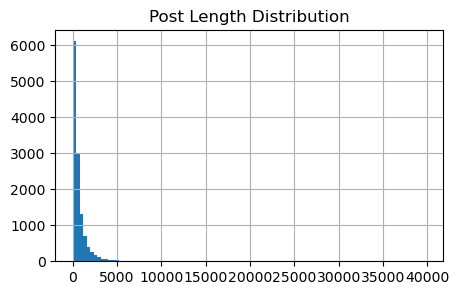

In [284]:
plt.figure(figsize=(5, 3))
df.post_length.hist(bins=100)
plt.title('Post Length Distribution');

In [285]:
print(f'Number of posts with length > 5000: {(df.post_length > 5000).sum()}')
print(f"That's only {(df.post_length > 5000).sum() / len(df) * 100:.2f}% of the data.")

Number of posts with length > 5000: 177
That's only 1.42% of the data.


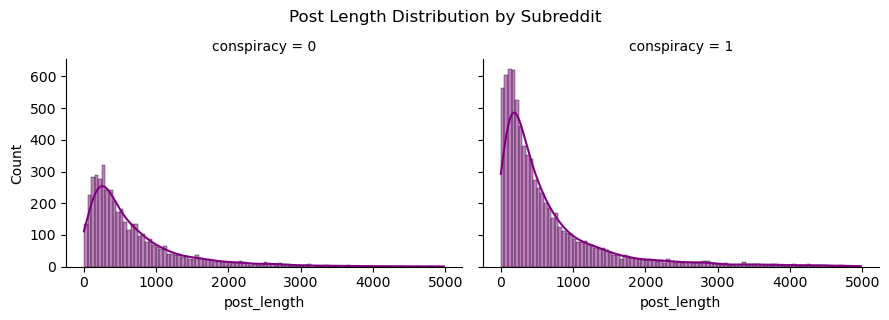

In [286]:
# Let's look at the distribution of the roughly 99% of the data that is less than 5000.
pl_dist_df = df.loc[df.post_length < 5000]
sns.displot(data= pl_dist_df,
            x=pl_dist_df.post_length,
            col='conspiracy',
            kde=True, 
            color='purple',
            height=3,
            aspect=1.5,
            bins=100,
            )
plt.suptitle('Post Length Distribution by Subreddit', y=1.05);

##### The distributions are very similar, but we do see that conspiracy is our majority class by a large margin.

### Post Words by Subreddit

In [287]:
df.post_words.describe()

count    12456.000000
mean       126.446452
std        241.912456
min          1.000000
25%         29.000000
50%         66.000000
75%        140.000000
max       6595.000000
Name: post_words, dtype: float64

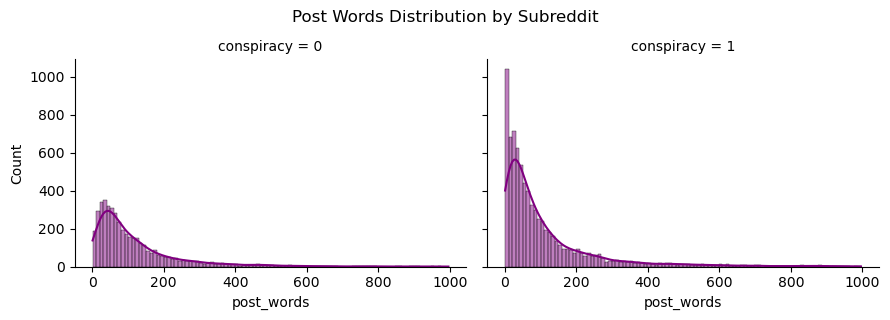

In [288]:
sns.displot(data= df,
            x=df.post_words.loc[df.post_words < 1000],
            col='conspiracy',
            kde=True, 
            color='purple',
            height=3,
            aspect=1.5,
            bins=100,
            )
plt.suptitle('Post Words Distribution by Subreddit', y=1.05);

##### Another case of mostly similar distributions with long right-side tails. One notable finding is that conspiracy has a higher concentration of posts with very few (0 to ~25) words.

### Interpretation

> I'm not thinking that post length will help our models too much because of how similar the distributions are across classes, however, the high concentration of few word posts in conspiracy might prove useful. 

___

## Sentiment Distributions by Subreddit

In [289]:
df.columns

Index(['selftext', 'title', 'conspiracy', 'post_length', 'post_words',
       'title_length', 'title_words', '000 year ago', '01 pdf fr',
       '01 pdf fr 1984',
       ...
       'zizek', 'zombi', 'selftext_neg', 'selftext_neu', 'selftext_pos',
       'selftext_compound', 'title_neg', 'title_neu', 'title_pos',
       'title_compound'],
      dtype='object', length=4015)

In [290]:
sentiment = df[['conspiracy', 'selftext_pos','selftext_neg',
                'selftext_neu', 'selftext_compound', 'title_pos',
                'title_neg', 'title_neu', 'title_compound']]

### Summary Stats

In [291]:
# Selftext Sentiment Summary Stats
sentiment[sentiment.columns[1:5]].describe()

,selftext_pos,selftext_neg,selftext_neu,selftext_compound
count,12456.000000,12456.000000,12456.000000,12456.000000
mean,0.121588,0.095548,0.781101,0.071118
std,0.120869,0.113853,0.157139,0.615251
min,0.000000,0.000000,0.000000,-0.999900
25%,0.000000,0.000000,0.689000,-0.458800
50%,0.103000,0.064000,0.788000,0.000000
75%,0.181000,0.152000,0.889000,0.636900
max,1.000000,1.000000,1.000000,0.999900


In [292]:
# Title Sentiment Summary Stats
sentiment[sentiment.columns[5:]].describe()

,title_pos,title_neg,title_neu,title_compound
count,12456.000000,12456.000000,12456.000000,12456.000000
mean,0.088930,0.105054,0.804328,-0.028316
std,0.179033,0.196513,0.251545,0.321285
min,0.000000,0.000000,0.000000,-0.962800
25%,0.000000,0.000000,0.615000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.058000,0.161000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.937100


### Selftext sentiment distributions

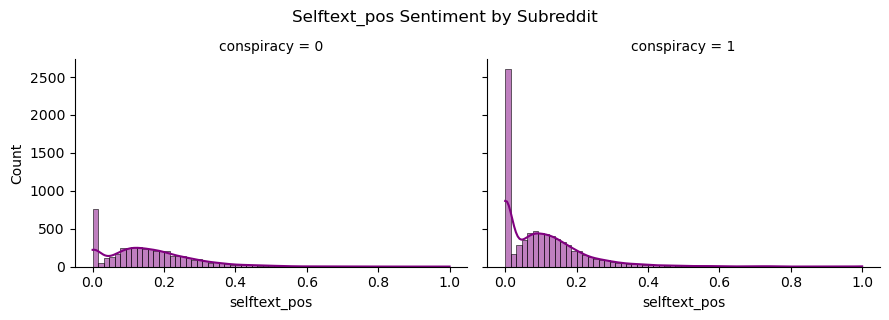

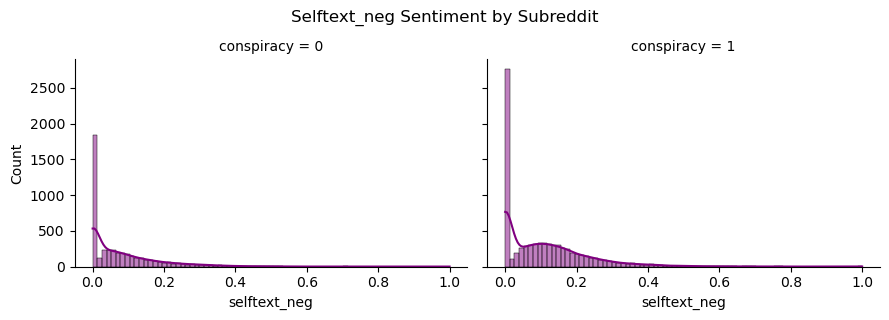

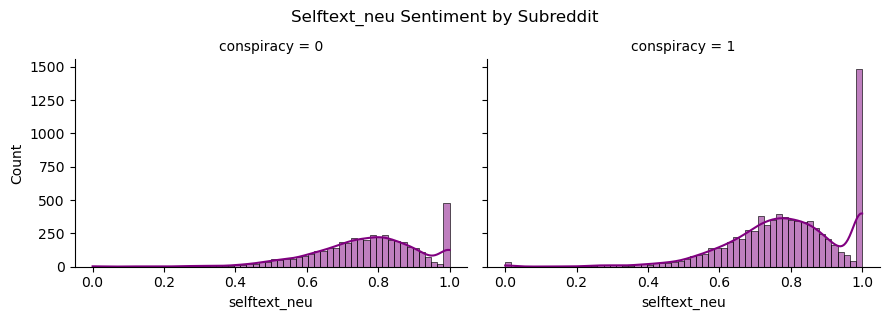

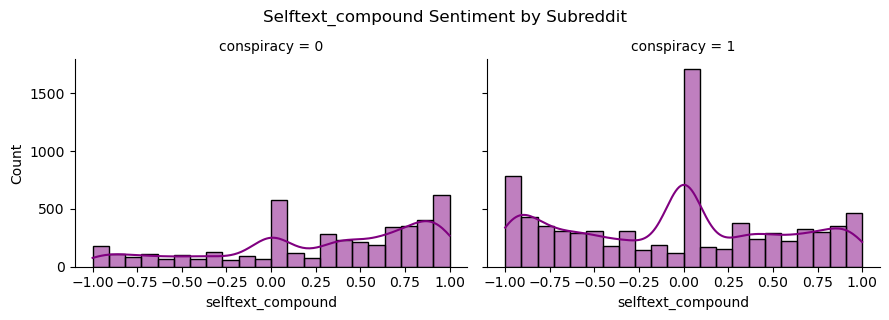

In [293]:
for col in ['selftext_pos','selftext_neg','selftext_neu', 'selftext_compound']:    
    sns.displot(data= sentiment,
                x=sentiment[col],
                col='conspiracy',
                kde=True, 
                color='purple',
                height=3,
                aspect=1.5,
                )
    plt.suptitle(f'{col.capitalize()} Sentiment by Subreddit', y=1.05);

#### Interpretation:

Rather surprisingly in my opinion, the sentiment distributions are very similar across classes. I'd have expected the conspiracy class to have a higher concentration of negative sentiment posts, but that doesn't seem to be the case. This is good news for our model because it means that we can use sentiment as a feature without worrying about it being too class-specific. Still helpful for our model, however, are the higher concentrations of negative and neutral compound sentiment scores in the conspiracy class. 

___

### Title sentiment distributions

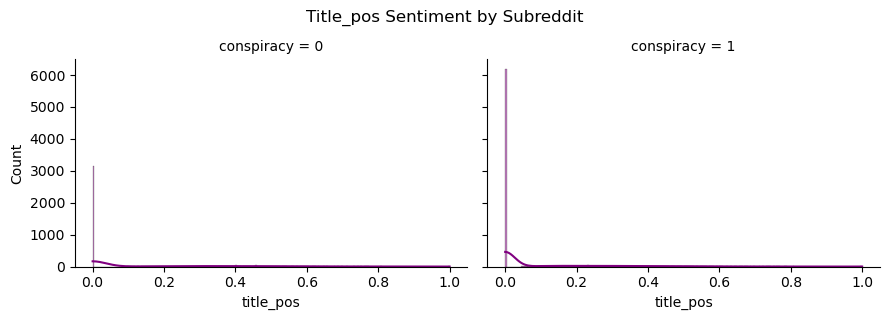

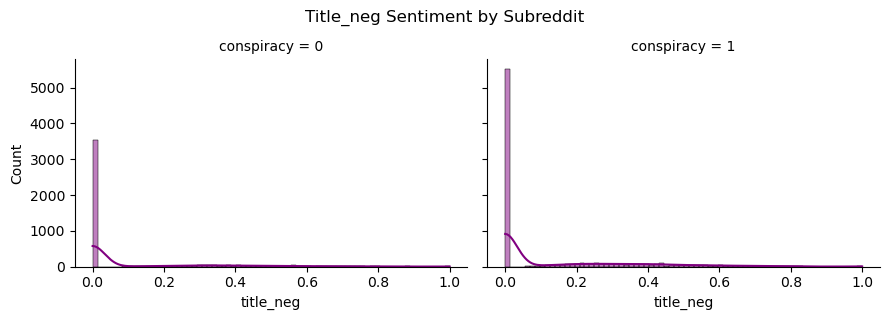

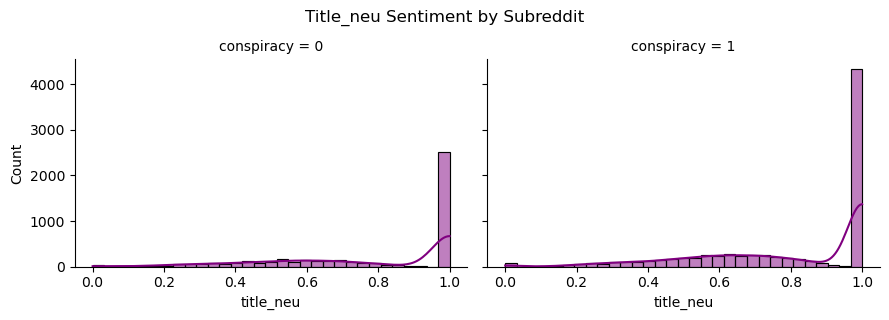

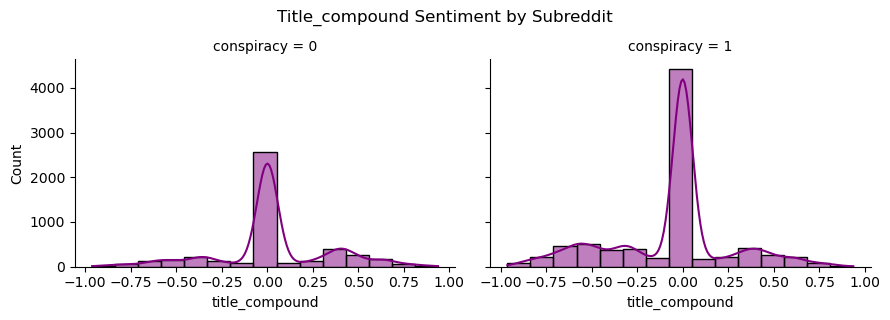

In [294]:
for col in ['title_pos','title_neg','title_neu', 'title_compound']:    
    sns.displot(data= sentiment,
                x=sentiment[col],
                col='conspiracy',
                kde=True, 
                color='purple',
                height=3,
                aspect=1.5,
                )
    plt.suptitle(f'{col.capitalize()} Sentiment by Subreddit', y=1.05);

#### Interpretation:

 Wow, I am quite surprised at the lack of sentiment in r/conspiracy titles. I definitely would have expected those to sway more in the negative direction. I'm not sure what to make of this, as the distributions across the two classes are extremely similar. I'm going to go ahead and implement title sentiments as features in our exploratoray models, but I'm not sure how much value they will add.

___

## Mean Sentiment Scores by Subreddit

In [295]:
mean_sentiment = sentiment.groupby('conspiracy').mean()
mean_sentiment.head()

,selftext_pos,selftext_neg,selftext_neu,selftext_compound,title_pos,title_neg,title_neu,title_compound
conspiracy,,,,,,,,
0,0.154139,0.076716,0.768031,0.291127,0.116446,0.083569,0.798413,0.033954
1,0.103495,0.106015,0.788366,-0.051170,0.073636,0.116996,0.807616,-0.062928


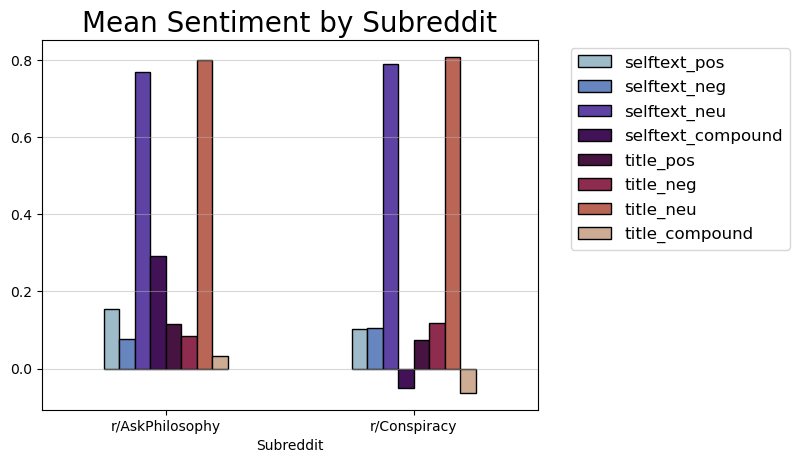

In [296]:
(mean_sentiment.plot(kind='bar', color=sns.color_palette('twilight', 8),
                     rot=0, edgecolor='black'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5, fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Subreddit')
plt.xticks(ticks=[0, 1], labels=['r/AskPhilosophy', 'r/Conspiracy'])
plt.title('Mean Sentiment by Subreddit', fontsize=20);

### Interpretation:

> The mean sentiment scores actually show some promise for our models in being able to identify our classes, particularly when considering selftext neutrality, which is much higher in the minority class (r/AskPhilosophy). Additionally, the mean title_compound score drops below 0 in the conspiracy class, which is a good sign that it might be able to help our models identify that class.

___

## An Aside:

##### There is a possibility that the stemming done earlier in the pipeline is causing the sentiment scores to be skewed. Depending on the results of our initial models, I'll remove stemming and see if that changes the predictive value of out sentiment scores.

Update: I removed stemming and the sentiment scores were not affected. I'm going to leave the stemmed words in the model for now, but I'll keep this in mind if the sentiment scores don't prove to be useful.

___

## Heatmaps

In [297]:
heat = df[['conspiracy', 'selftext_pos','selftext_neg',
           'selftext_neu', 'selftext_compound', 'title_pos',
           'title_neg', 'title_neu', 'title_compound',
           'post_length', 'post_words','title_length', 'title_words']]

### Feature-Target Heatmap

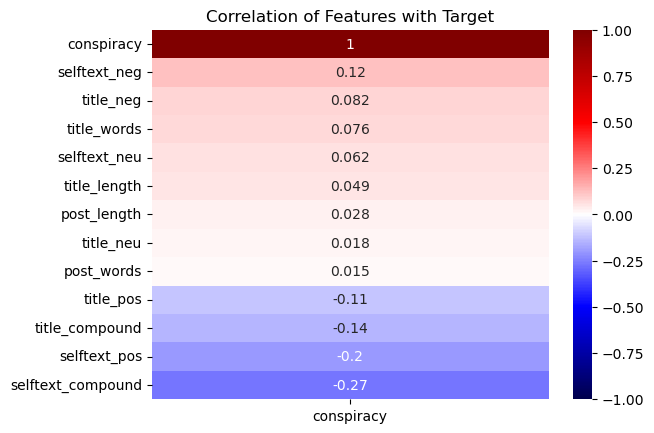

In [298]:
sns.heatmap(heat.corr()[['conspiracy']].sort_values(by='conspiracy', ascending=False), 
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = 'seismic')
plt.title('Correlation of Features with Target');

### Correlation Heatmap

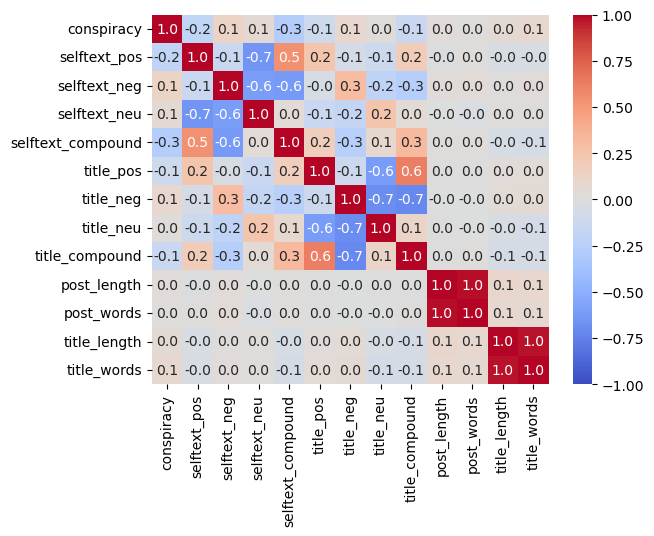

In [299]:
sns.heatmap(heat.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.1f');

### Interpretation:

 Most of what we see here is to be expected. Unfortunately, the sentiment and text count/length features are not going to be very useful in predicting classe due to their low correlation with the target variable.

 Positive and negative sentiment scores are inversely correlated, which is logical. 
 
 The text lengths (character counts) are highly correlated with word counts. This is to be expected, as longer posts will have more words and therefore more characters. We'll need to drop one of each of these features in our models to avoid multicollinearity.

___

In [300]:
df.columns

Index(['selftext', 'title', 'conspiracy', 'post_length', 'post_words',
       'title_length', 'title_words', '000 year ago', '01 pdf fr',
       '01 pdf fr 1984',
       ...
       'zizek', 'zombi', 'selftext_neg', 'selftext_neu', 'selftext_pos',
       'selftext_compound', 'title_neg', 'title_neu', 'title_pos',
       'title_compound'],
      dtype='object', length=4015)

## Words and their Attitudes

First, I'll take a look at some positive posts from our data just to see what those posts are like. Then, we'll look at the same for negative posts.

### Positive Posts!

In [301]:
positives = (df
 .loc[df.post_words > 10] # so as to avoid few word (meaningless) posts
 .sort_values(by='selftext_pos', ascending=False)[['selftext','conspiracy']]
 .head(10)
)
print('Top 10 Selftext Positives')
print('='*90)
print(positives.selftext.values)

Top 10 Selftext Positives
['s control vote laugh ha ha ha ha ha' 'like put interest'
 'well awar popular one need recommend'
 'glad sun free nobodi truli take joy away love sunbath sun best feel enjoy sunshin'
 'care true frog true u better start jump kettl late'
 'inflat happen wealth move rich'
 'spritual freedom religi belief view freedom'
 'determin true free henc determin must true sinc certainli free'
 'know hit good luck everyon'
 'child strong emot even puberti realiz love love conquer matter talk male femal love']


### Negative Posts :(

#### LANGUAGE WARNING!!!!
### These posts are NSFW and contain offensive language.

##### I am leaving the cell below commented out because I don't want to accidentally run it and have it print out a bunch of offensive language. If you want to see the results, you can uncomment the cell and run it.

In [302]:
# negatives = (df
#     .loc[df.post_words > 10] # so as to avoid few word (meaningless) posts
#     .sort_values(by='selftext_neg', ascending=False)[['selftext','conspiracy']]
#     .head(10)
# )
# print('Top 10 Selftext Negatives')
# print('='*90)
# print(negatives.selftext.values)

___

## N-gram exploration

In [303]:
excols = ['selftext', 'title', 'post_length', 'post_words', 'title_length', 'title_words',
          'selftext_pos', 'selftext_neg', 'selftext_neu', 'selftext_compound', 
          'title_pos', 'title_neg', 'title_neu', 'title_compound']
words = (df.drop(columns=excols)
         .groupby('conspiracy')
         .sum()
         .T
         .rename(columns={0:'r/AskPhilosophy', 1:'r/Conspiracy'})
         .rename_axis('Word',axis=1))

In [304]:
words.head()

Word,r/AskPhilosophy,r/Conspiracy
000 year ago,0,7
01 pdf fr,0,6
01 pdf fr 1984,0,6
06 01 pdf,0,12
06 01 pdf fr,0,6


### Top 10 1-grams by Subreddit

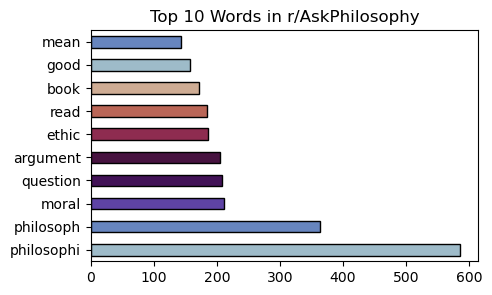

In [305]:
# Top 10 words in r/AskPhilosophy
(words.loc[:, 'r/AskPhilosophy'].sort_values(ascending=False).head(10)
  .plot(kind='barh', color=sns.color_palette('twilight', 8), edgecolor='black',
       figsize=(5,3)))
plt.title('Top 10 Words in r/AskPhilosophy');

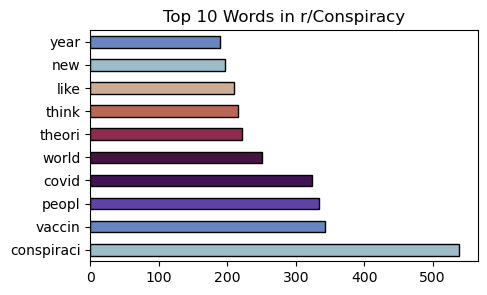

In [306]:
# Top 10 words in r/Conspiracy
(words.loc[:, 'r/Conspiracy'].sort_values(ascending=False).head(10)
 .plot(kind='barh', color=sns.color_palette('twilight', 8), edgecolor='black',
       figsize=(5,3)))
plt.title('Top 10 Words in r/Conspiracy');

### Interpretation:

> The top 1-grams are mostly what you'd expect. I find it both strikingly accurate and slightly comical that the most common word in the conspiracy class is vaccine, with covid taking 3rd place. It's as spot on as you could be. Top 10 words in the philosophy class are all pretty standard, though it is interesting to note that moral/ethical philosophy is the most represented via these words (as opposed to other types like metaphysics, epistemology, etc.).

### Top 10 n-grams by Subreddit (n > 1)

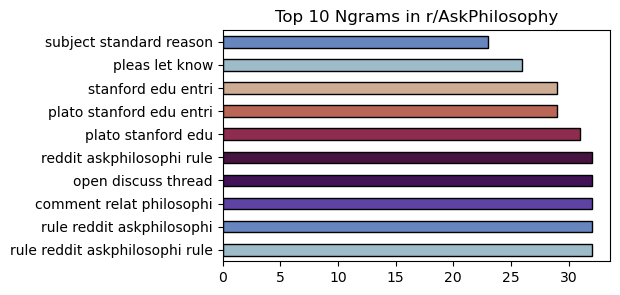

In [307]:
# Top 10 ngrams in r/AskPhilosophy
ngrams = words.index[words.index.str.contains(' ')].to_list() # only ngrams contain spaces
(words.loc[ngrams, 'r/AskPhilosophy'].sort_values(ascending=False).head(10)
  .plot(kind='barh', color=sns.color_palette('twilight', 8), edgecolor='black',
       figsize=(5,3)))
plt.title('Top 10 Ngrams in r/AskPhilosophy');

> Here, we get relatively uninteresting information about the top philosophy n-grams. Most of these have to deal with subreddit rules or the very popular stanford encyclopedia of philosophy.

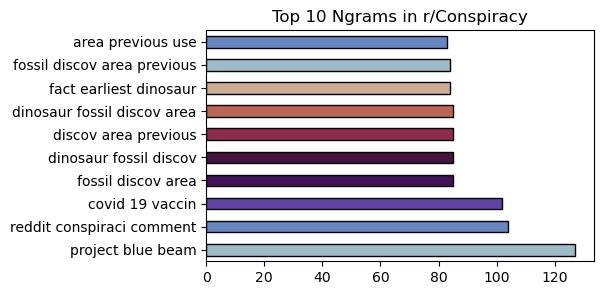

In [308]:
# Top 10 ngrams in r/Conspiracy
(words.loc[ngrams, 'r/Conspiracy'].sort_values(ascending=False).head(10)
  .plot(kind='barh', color=sns.color_palette('twilight', 8), edgecolor='black',
       figsize=(5,3)))
plt.title('Top 10 Ngrams in r/Conspiracy');

> The top r/Conspiracy n-grams are a lot more interesting. We see a lot of covid related n-grams, which is to be expected. However, I've never heard of project blue beam, which I'll now have to be checking out. I'm also intrigued at the high volume of dinosaur related n-grams. I'm not sure what to make of that, but it's definitely interesting.



___

## Final Remarks

### What we learned:

1. The distributions of post length and word count are very similar across classes, but we do see that conspiracy is our majority class by a large margin.
2. One notable finding is that conspiracy has a higher concentration of posts with very few (0 to ~25) words.
3. The sentiment distributions are very similar across classes, but we do see that conspiracy has a higher concentration of negative and neutral sentiment scores.
4. The mean sentiment scores are also very similar across classes, but we do see that conspiracy has a higher concentration of neutral sentiment scores.
5. The text lengths (character counts) are highly correlated with word counts. This is to be expected, as longer posts will have more words and therefore more characters. We'll drop the character count feature in our models to avoid multicollinearity.

### Final Dataset Output:

In [309]:
df = df.drop(columns=['selftext', 'title', 'post_length','title_length'])
df.to_csv('data/model_data.csv', index=False)